# Setup Localhost on Colabs

Run this in the local terminal:

**<code>
jupyter notebook \ \
  --NotebookApp.allow_origin='https://colab.research.google.com' \ \
  --port=8888 \ \
  --NotebookApp.port_retries=0 \ \
</code>**

'Then hit the CONNECT dropdown on the top right of this screen to Connect to the Localhost 

Setting Path at Unix/Linux
To add the Python directory to the path for a particular session in Unix −

In the csh shell − type setenv PATH "$PATH:/usr/local/bin/python3" and press Enter.

In the bash shell (Linux) − type export PYTHONPATH=/usr/local/bin/python3.4 and press Enter.

In the sh or ksh shell − type PATH = "$PATH:/usr/local/bin/python3" and press Enter.

Note − /usr/local/bin/python3 is the path of the Python directory.

In [1]:
import subprocess
from IPython.display import display, clear_output
import os

def upload_code(code): 
    # Save the code to a file 
    with open('src/main.cpp', 'w') as f:
        f.write(code) 

    # Compile the code
    cmd = 'C:\\Users\\carlos\\.platformio\\penv\\Scripts\\platformio.exe run --target upload -v'
    process = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    show = False

    # Wait for the words "Serial port" to appear in the output
    while True:
        output = process.stdout.readline().decode()
        if output == '' and process.poll() is not None:
            break
        if 'Serial port' in output:
            show = True 
        if show:
            display(output.strip())

    # Get the output and errors after the process has completed
    output, error = process.communicate()
    # print(output.decode())
    # print(error.decode())

    # Clear the output once the process has completed
    clear_output()

def read_and_upload_code(file_path): 
    with open(file_path, 'r') as f:
        code = f.read() 
        upload_code(code)

directory = os.path.join(os.getcwd(), 'samples')
files = os.listdir(directory)
for file in files:
    ''
    # print(file)

In [4]:
# file = 'a_FastLedFTT.cpp'
file = 'analogSoundSampleSketch.cpp'
# file = 'gpt4_v4.cpp'

In [5]:
read_and_upload_code(directory+'/'+file)

This is a simple example to read the serial output

In [6]:
import serial
from IPython.display import clear_output

ser = serial.Serial()
ser.baudrate = 9600
ser.port = 'COM8'
ser.open()
ser.flushInput()

try:
    while True:
        inpt = ser.readline()
        print(inpt.decode('utf-8').strip())
except KeyboardInterrupt:
    print("Keyboard Interrupt. Exiting...")
finally: 
    clear_output()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 3: invalid start byte

this is a more complex example

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 8: invalid start byte

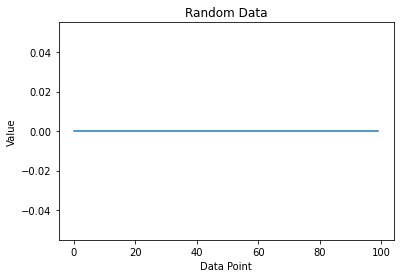

In [7]:
import serial
from IPython.display import clear_output, display
import matplotlib.pyplot as plt
import csv
import time

ser = serial.Serial()
ser.baudrate = 9600
ser.port = 'COM8'
ser.open()
ser.flushInput()

# Create an empty list to store the data
data = [0] * 100

# Create the plot
plt.ion() # Turn on interactive mode
fig, ax = plt.subplots()
line, = ax.plot(data)
ax.set_title("Random Data")
ax.set_xlabel("Data Point")
ax.set_ylabel("Value")

try:
    while True:
        # Read a line of data from the serial port
        inpt = ser.readline().decode('utf-8').strip()

        # Parse the data and append it to the list
        try:
            value = int(inpt)
            data.pop(0)  # Remove the first value from the list
            data.append(value)  # Append the new value to the end of the list
        except IndexError:
            pass

        # Update the plot
        line.set_ydata(data)
        ax.relim()
        ax.autoscale_view()
        fig.canvas.draw()
        fig.canvas.flush_events()

        # Display the plot
        clear_output(wait=True)
        display(fig)

        # save the output 
        with open("test_data.csv","a", newline="") as f:
            writer = csv.writer(f,delimiter=",")
            writer.writerow([time.time(),value])

except KeyboardInterrupt:
    print("Keyboard Interrupt. Exiting...")
finally:
    ser.close()
    clear_output()


https://github.com/atuline/WLED/wiki

- Several volume reactive effects.
- Several FFT (frequency) reactive effects.
- Some new non-reactive 1D effects.

https://github.com/atuline/WLED/wiki/Analog-Audio-Input-Options

- Adafruit - $6.95 - Electret Microphone Amp - [MAX4466](https://www.adafruit.com/product/1063) with Adjustable Gain
- Digikey - $7.95 - Electret Microphone Amp Audio Evaluation Board - [MAX9814](https://www.digikey.com/en/products/detail/adafruit-industries-llc/1713/4990777?s=N4IgjCBcoLQBxVAYygMwIYBsDOBTANCAPZQDa4ArAEwIC6AvvYVWeAOxgDMIDQA)
- SparkFun - $6.95 - MEMS Microphone Breakout - [ICS-40180](https://www.sparkfun.com/products/18011)
- AliExpress - $1.61 - I2S MEMS Microphone - [ INMP441](https://www.aliexpress.com/i/2251832776111658.html?gatewayAdapt=4itemAdapt)

background noise filtering (or squelch)

Tge ESP32 uses a 12 bit ADC

https://github.com/atuline/WLED/wiki/Reactive-Animations

https://github.com/atuline/WLED/wiki/My--device--is-not-working

- Are you compiling from IDE? We are no longer supporting the Arduino IDE.
- Leave the MAX4466 gain untouched. It works fine out of the box.
- https://github.com/atuline/WLED/wiki/Analog-Sound-Sampling-Sketch-Example 
- https://github.com/atuline/WLED/wiki/Digital-Sound-Sampling-Sketch-Example
- - What are the results of that sketch? Does it respond to your speech? A MAX4466 and INMP401 should average about 1875 on an ESP32, a MAX9814 about 1350 for all gain settings.
- SR WLED had to change from the default 'partition size' because we outgrew the default 1MB. As a result, you need to perform a 'Factory reset' after flashing it.
- You may need to re-flash/clear the device completely especially after a major update.

https://github.com/atuline/WLED/wiki/Installing-and-Compiling

Compiling from Platform IO

- ⇛ first read https://kno.wled.ge/advanced/compiling-wled/
- → use source code from https://github.com/atuline/WLED/tree/master
- → start with one of the sound reactive compile environments, like env:soundReactive_esp32dev
- → read wled00/wled.h, add your own settings to wled00/my_config.h
- → put your own compile environment(s) into platformio_override.ini.

SoundReactive has some additional compile time options - see wled00/audio_reactive.h and wled00/audio_source.h.

https://github.com/atuline/WLED/wiki/UDP-Sound-Sync

UDP Sound Sync does not sync the actual animations, but rather transmits summary audio sampling information to several devices that still run their own animations locally. In a nutshell, it means that several devices can share a single microphone.

https://github.com/atuline/WLED/wiki/First-Time-Setup

Analog or I2S Digital?

- We recommend using an I2S digital microphone with ESP32 boards - like INMP441, ICS-43434, or PDM microphones.
- Analog input (Microphone or Line-in) is also possible, however you might have power fluctuation (3.3V) and noise issues when using these. **Analog devices are handled by the "ADC1" unit of your ESP32. Problems can be expected when connecting "analog buttons" (Potentiometer) to the same ADC1 unit.**
- Finally **Analog Microphones often work best when placed very close to the sound source, while digital ones like the INMP441 can easily pick up sound from several meters apart**. With the analog MAX4466, we found that 30-50cm is an optimal distance.

While providing a lot of functionality, the ESP8266 and the ESP32 boards (typical ones) we have been using, have experienced a lot of spurious noise on their ADC pins

- On ESP32, use an I2S microphone, such as the INMP441, SPH0645 or ICS-43434.
- Isolate the power between the LED strips and the controller.
- Don't power your LED stripe from the ESP32 3.3v or 5v pins.
- Don't use USB power from your PC.
- Some batches of analog microphones are just no good.



In [ ]:
https://install.wled.me/

https://github.com/Aircoookie/WLED/blob/d1fed11d0d0e93b727d8156e9523f3d1a47ce05f/usermods/audioreactive/audio_reactive.h#L95

https://github.com/Aircoookie/WLED/blob/d1fed11d0d0e93b727d8156e9523f3d1a47ce05f/wled00/data/index.js#L781

https://github.com/Aircoookie/WLED/blob/d1fed11d0d0e93b727d8156e9523f3d1a47ce05f/.envrc

https://github.com/atuline/WLED

https://github.com/atuline/WLED/wiki/My--device--is-not-working

https://github.com/atuline/WLED/wiki/Analog-Sound-Sampling-Sketch-Example

https://github.com/search?q=repo%3AAircoookie%2FWLED%20audio&type=code

https://www.youtube.com/watch?v=KplepH9BT9w&t=68s

https://install.wled.me/

